In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

file = pd.read_csv("..//Data//Dallas_Police_Arrests.csv")

file.head()

,IncidentNum,Arrest Year,Arrest Date,Arrest Time,Arrest Address,Arrest Zipcode,Latitude,Longitude,Arrest City,Arrest State,Arrest Day of The Week,Arrest Location,Arrest Weapon,Arrestee Age At Arrest Time,Arrestee Race,Arrestee Sex,Drug Related,Drug Type
0,110555-2019,2019,6/2/2019,4:45:00 PM,500 E JEFFERSON BLVD,75203,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,40,Hispanic or Latino,Male,No,NaN
1,152471-2019,2019,7/28/2019,8:40:00 PM,4800 MAPLE AVE,75235,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,36,White,Female,No,NaN
2,235407-2021,2021,12/31/2021,9:11:00 PM,13165 N CENTRAL EXPY,75243,32.7758,-96.7967,Dallas,Texas,Fri,Other,Unarmed,28,Black,Male,No,NaN
3,154267-2018,2018,7/15/2018,12:10:00 AM,1800 CADIZ ST,75201,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,35,Middle Eastern,Male,No,NaN
4,087877-2018,2018,4/26/2018,2:22:00 PM,9304 HARRY HINES BLVD,75220,32.7758,-96.7967,Dallas,Texas,Thu,NaN,Unarmed,31,Black,Male,No,NaN


In [38]:
df = file

In [39]:
df.value_counts("Arrestee Race")

Arrestee Race
Black                               26757
Hispanic or Latino                  19520
White                               14385
Asian                                 481
Middle Eastern                        301
American Indian or Alaska Native      132
Native Hawaiian/Pacific Islander       66
Unknown                                13
NH                                      1
dtype: int64

In [40]:
df4=df.rename(columns={'IncidentNum':"incident", 'Arrest Year':"year", 'Arrest Date':"date", 'Arrest Time':"time",
       'Arrest Address':"address", 'Arrest Zipcode':"zipcode", 'Latitude':"lat", 'Longitude':"long",
       'Arrest City':"city", 'Arrest State':"state", 'Arrest Day of The Week ':'day',
       'Arrest Location':"location", 'Arrest Weapon':"weapon", 'Arrestee Age At Arrest Time':"age",
       'Arrestee Race':"race", 'Arrestee Sex':"gender", 'Drug Related':"drugRelated", 'Drug Type':"drugType"})

In [41]:
df4.describe()

,year,zipcode,Latitude,age
count,61656.000000,61656.000000,61612.000000,61656.000000
mean,2017.742604,75218.697807,32.776587,35.073845
std,2.267065,408.667364,0.144953,12.059544
min,2014.000000,0.000000,30.770600,18.000000
25%,2016.000000,75210.000000,32.775800,25.000000
50%,2018.000000,75219.000000,32.775800,32.000000
75%,2020.000000,75231.000000,32.775800,43.000000
max,2022.000000,78225.000000,57.650100,91.000000


In [42]:
df4.shape

(61656, 18)

In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61656 entries, 0 to 61655
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   incident     61656 non-null  object 
 1   year         61656 non-null  int64  
 2   date         61656 non-null  object 
 3   time         61656 non-null  object 
 4   address      61656 non-null  object 
 5   zipcode      61656 non-null  int64  
 6   Latitude     61612 non-null  float64
 7   Longitude    61656 non-null  object 
 8   city         61628 non-null  object 
 9   state        61656 non-null  object 
 10  day          61656 non-null  object 
 11  location     60919 non-null  object 
 12  weapon       61656 non-null  object 
 13  age          61656 non-null  int64  
 14  race         61656 non-null  object 
 15  gender       61656 non-null  object 
 16  drugRelated  61656 non-null  object 
 17  drugType     8890 non-null   object 
dtypes: float64(1), int64(3), object(14)
memory usa

In [44]:
df2=df.dropna()

In [45]:
df2.shape

(8717, 18)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8717 entries, 11 to 61653
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IncidentNum                  8717 non-null   object 
 1   Arrest Year                  8717 non-null   int64  
 2   Arrest Date                  8717 non-null   object 
 3   Arrest Time                  8717 non-null   object 
 4   Arrest Address               8717 non-null   object 
 5   Arrest Zipcode               8717 non-null   int64  
 6   Latitude                     8717 non-null   float64
 7   Longitude                    8717 non-null   object 
 8   Arrest City                  8717 non-null   object 
 9   Arrest State                 8717 non-null   object 
 10  Arrest Day of The Week       8717 non-null   object 
 11  Arrest Location              8717 non-null   object 
 12  Arrest Weapon                8717 non-null   object 
 13  Arrestee Age At 

In [47]:
df5=df4.drop(columns=['drugType'])

In [48]:
df6=df5.dropna()

In [49]:
df6.value_counts("weapon")

weapon
Unarmed                      29632
None                         24229
Handgun                       1922
Hands/Feet                    1182
Knife - Pocket                1040
Gun                            960
Other                          431
Knife - Other                  331
Drugs                          310
Vehicle                        173
Stabbing Instrument            110
Other Firearm                   84
Club                            80
Knife - Butcher                 79
THREATS                         66
Firearm (Type Not Stated)       58
Lethal Cutting Instrument       51
Rock                            43
Poison                          32
Shotgun                         28
Strangulation                   18
Burn                             7
Missle/Arrow                     5
Explosives                       3
33                               2
dtype: int64

In [50]:
df7 = df6.groupby(["weapon"]).agg({"weapon":"count"})
df7

df8 = pd.DataFrame(df7, columns = ['weapon'])
df8
df9=df8.drop(index="33")
df9

,weapon
weapon,
Burn,7
Club,80
Drugs,310
Explosives,3
Firearm (Type Not Stated),58
Gun,960
Handgun,1922
Hands/Feet,1182
Knife - Butcher,79


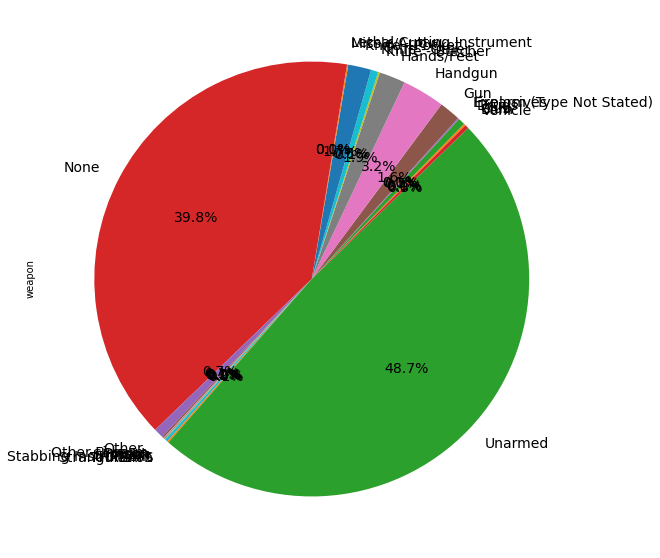

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plt.figure(figsize=(24,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pie = df9.plot(kind='pie', y = 'weapon', ax=ax1, autopct='%1.1f%%', 
 startangle=45, shadow=False, legend = False, fontsize=14)

plt.show()

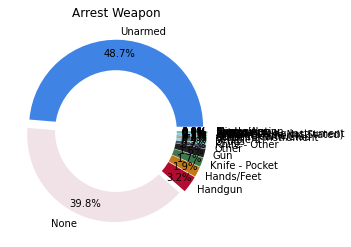

In [52]:
import matplotlib.pyplot as plt
  
# Setting labels for items in Chart
labels=["Unarmed", "None","Handgun","Hands/Feet","Knife - Pocket",
        "Gun","Other","Knife - Other","Drugs","Vehicle",
        "Stabbing Instrument","Other Firearm,Club", "Knife - Butcher","THREATS","Firearm (Type Not Stated)",
        "Lethal Cutting Instrument","Rock","Poison","Shotgun","Strangulation",
        "Burn","Missle/Arrow","Explosives"]
  
# Setting size in Chart based on 
# given values
weapon=[29632,24229,1922,1182,1040,960,431,331,310,173,110,84,80,79,66,58,51,43,32,28,18,7,2]
  
# colors
colors = ['#3F84E5', '#F0E2E7', '#B20D30','#C17817', '#3F784C',
         '#222222',"#4B4E6D",'#84DCC6',"#95A3B3","#757761",
         '#8FF7A7','#51BBFE','#3772FF','#FDCA40','#A1BA89',
         '#03B5AA','#037971','#023436','#00BFB3','#049A8F',
         '#EDD4B2','#D0A98F','#4D243D']
# explosion
explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(weapon, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Arrest Weapon')
  
# Displaying Chart
plt.show()

In [53]:
df6.value_counts("gender")

gender
Male       49642
Female     11231
Unknown        2
TEST           1
dtype: int64

In [54]:
maska = (df6["gender"] == "Male") | (df6["gender"] == "Female" ) 
df10 = df6.loc[maska,:]
df10

,incident,year,date,time,address,zipcode,Latitude,Longitude,city,state,day,location,weapon,age,race,gender,drugRelated
0,110555-2019,2019,6/2/2019,4:45:00 PM,500 E JEFFERSON BLVD,75203,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,40,Hispanic or Latino,Male,No
1,152471-2019,2019,7/28/2019,8:40:00 PM,4800 MAPLE AVE,75235,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,36,White,Female,No
2,235407-2021,2021,12/31/2021,9:11:00 PM,13165 N CENTRAL EXPY,75243,32.7758,-96.7967,Dallas,Texas,Fri,Other,Unarmed,28,Black,Male,No
3,154267-2018,2018,7/15/2018,12:10:00 AM,1800 CADIZ ST,75201,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,35,Middle Eastern,Male,No
5,013624-2019,2019,1/20/2019,8:20:00 PM,2500 HICKORY ST,75226,32.7758,-96.7967,Dallas,Texas,Sun,Outdoor Area Public/Private,Unarmed,44,Black,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61651,199902-2018,2018,9/8/2018,6:30:00 PM,1100 HOKE SMITH DR,75224,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,18,Hispanic or Latino,Male,Yes
61652,176371-2020,2020,10/3/2020,8:45:00 PM,2800 E LEDBETTER DR,75216,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,55,Black,Male,Yes
61653,230707-2015,2015,10/4/2015,10:20:00 PM,10025 SHOREVIEW RD,75238,32.7758,-96.7967,Dallas,Texas,Sun,Apartment Complex/Building,Hands/Feet,45,Black,Male,Yes
61654,259934-2014,2014,10/29/2014,12:15:00 AM,1400 N BECKLEY AVE,75203,32.7758,-96.7967,Dallas,Texas,Wed,"Highway, Street, Alley ETC",Drugs,20,Black,Male,No


In [55]:
df10.value_counts("race")

race
Black                               26391
Hispanic or Latino                  19302
White                               14199
Asian                                 475
Middle Eastern                        299
American Indian or Alaska Native      128
Native Hawaiian/Pacific Islander       66
Unknown                                12
NH                                      1
dtype: int64

In [56]:
maskb = (df10["race"] == "Black") | (df10["race"] == "Hispanic or Latino")|(df10["race"] == "White") | (df10["race"] == "Asian") |(df10["race"] == "Middle Eastern") | (df10["race"] == "American Indian or Alaska Native") |(df10["race"] == "Native Hawaiian/Pacific Islander") 

df11 = df10.loc[maskb,:]
df11

,incident,year,date,time,address,zipcode,Latitude,Longitude,city,state,day,location,weapon,age,race,gender,drugRelated
0,110555-2019,2019,6/2/2019,4:45:00 PM,500 E JEFFERSON BLVD,75203,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,40,Hispanic or Latino,Male,No
1,152471-2019,2019,7/28/2019,8:40:00 PM,4800 MAPLE AVE,75235,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,36,White,Female,No
2,235407-2021,2021,12/31/2021,9:11:00 PM,13165 N CENTRAL EXPY,75243,32.7758,-96.7967,Dallas,Texas,Fri,Other,Unarmed,28,Black,Male,No
3,154267-2018,2018,7/15/2018,12:10:00 AM,1800 CADIZ ST,75201,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,35,Middle Eastern,Male,No
5,013624-2019,2019,1/20/2019,8:20:00 PM,2500 HICKORY ST,75226,32.7758,-96.7967,Dallas,Texas,Sun,Outdoor Area Public/Private,Unarmed,44,Black,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61651,199902-2018,2018,9/8/2018,6:30:00 PM,1100 HOKE SMITH DR,75224,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,18,Hispanic or Latino,Male,Yes
61652,176371-2020,2020,10/3/2020,8:45:00 PM,2800 E LEDBETTER DR,75216,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,55,Black,Male,Yes
61653,230707-2015,2015,10/4/2015,10:20:00 PM,10025 SHOREVIEW RD,75238,32.7758,-96.7967,Dallas,Texas,Sun,Apartment Complex/Building,Hands/Feet,45,Black,Male,Yes
61654,259934-2014,2014,10/29/2014,12:15:00 AM,1400 N BECKLEY AVE,75203,32.7758,-96.7967,Dallas,Texas,Wed,"Highway, Street, Alley ETC",Drugs,20,Black,Male,No


In [57]:
df10.value_counts("zipcode")

zipcode
75201    3724
75216    3466
75220    3405
75217    2856
75215    2830
         ... 
75154       1
75172       1
75200       1
7521        1
78225       1
Length: 119, dtype: int64

In [58]:
maskc = df11["zipcode"] != 7521
df12 = df11.loc[maskc,:]
df12

,incident,year,date,time,address,zipcode,Latitude,Longitude,city,state,day,location,weapon,age,race,gender,drugRelated
0,110555-2019,2019,6/2/2019,4:45:00 PM,500 E JEFFERSON BLVD,75203,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,40,Hispanic or Latino,Male,No
1,152471-2019,2019,7/28/2019,8:40:00 PM,4800 MAPLE AVE,75235,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,36,White,Female,No
2,235407-2021,2021,12/31/2021,9:11:00 PM,13165 N CENTRAL EXPY,75243,32.7758,-96.7967,Dallas,Texas,Fri,Other,Unarmed,28,Black,Male,No
3,154267-2018,2018,7/15/2018,12:10:00 AM,1800 CADIZ ST,75201,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,35,Middle Eastern,Male,No
5,013624-2019,2019,1/20/2019,8:20:00 PM,2500 HICKORY ST,75226,32.7758,-96.7967,Dallas,Texas,Sun,Outdoor Area Public/Private,Unarmed,44,Black,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61651,199902-2018,2018,9/8/2018,6:30:00 PM,1100 HOKE SMITH DR,75224,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,18,Hispanic or Latino,Male,Yes
61652,176371-2020,2020,10/3/2020,8:45:00 PM,2800 E LEDBETTER DR,75216,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,55,Black,Male,Yes
61653,230707-2015,2015,10/4/2015,10:20:00 PM,10025 SHOREVIEW RD,75238,32.7758,-96.7967,Dallas,Texas,Sun,Apartment Complex/Building,Hands/Feet,45,Black,Male,Yes
61654,259934-2014,2014,10/29/2014,12:15:00 AM,1400 N BECKLEY AVE,75203,32.7758,-96.7967,Dallas,Texas,Wed,"Highway, Street, Alley ETC",Drugs,20,Black,Male,No


In [59]:
df12.value_counts("year")

year
2018    9245
2019    8343
2015    7956
2016    7781
2020    7755
2021    7585
2017    5852
2014    5472
2022     870
dtype: int64

In [60]:
df13 = df12.groupby(["gender"]).agg({"age":"mean"})
df14=df13.reset_index()
df14

,gender,age
0,Female,34.013183
1,Male,35.306375


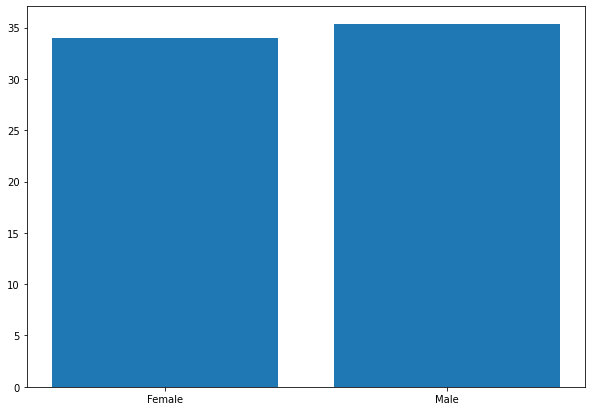

In [61]:
age = df14['age']
gender = df14['gender']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(gender, age)
 
# Show Plot
plt.show()

In [62]:
maskd = df12["weapon"] != "33"
df30 = df12.loc[maskd,:]
df30

,incident,year,date,time,address,zipcode,Latitude,Longitude,city,state,day,location,weapon,age,race,gender,drugRelated
0,110555-2019,2019,6/2/2019,4:45:00 PM,500 E JEFFERSON BLVD,75203,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,40,Hispanic or Latino,Male,No
1,152471-2019,2019,7/28/2019,8:40:00 PM,4800 MAPLE AVE,75235,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,36,White,Female,No
2,235407-2021,2021,12/31/2021,9:11:00 PM,13165 N CENTRAL EXPY,75243,32.7758,-96.7967,Dallas,Texas,Fri,Other,Unarmed,28,Black,Male,No
3,154267-2018,2018,7/15/2018,12:10:00 AM,1800 CADIZ ST,75201,32.7758,-96.7967,Dallas,Texas,Sun,Other,Unarmed,35,Middle Eastern,Male,No
5,013624-2019,2019,1/20/2019,8:20:00 PM,2500 HICKORY ST,75226,32.7758,-96.7967,Dallas,Texas,Sun,Outdoor Area Public/Private,Unarmed,44,Black,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61651,199902-2018,2018,9/8/2018,6:30:00 PM,1100 HOKE SMITH DR,75224,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,18,Hispanic or Latino,Male,Yes
61652,176371-2020,2020,10/3/2020,8:45:00 PM,2800 E LEDBETTER DR,75216,32.7758,-96.7967,Dallas,Texas,Sat,"Highway, Street, Alley ETC",Unarmed,55,Black,Male,Yes
61653,230707-2015,2015,10/4/2015,10:20:00 PM,10025 SHOREVIEW RD,75238,32.7758,-96.7967,Dallas,Texas,Sun,Apartment Complex/Building,Hands/Feet,45,Black,Male,Yes
61654,259934-2014,2014,10/29/2014,12:15:00 AM,1400 N BECKLEY AVE,75203,32.7758,-96.7967,Dallas,Texas,Wed,"Highway, Street, Alley ETC",Drugs,20,Black,Male,No


In [63]:
df31=df30[["address","zipcode", "drugRelated","gender","race"]]
df31

,address,zipcode,drugRelated,gender,race
0,500 E JEFFERSON BLVD,75203,No,Male,Hispanic or Latino
1,4800 MAPLE AVE,75235,No,Female,White
2,13165 N CENTRAL EXPY,75243,No,Male,Black
3,1800 CADIZ ST,75201,No,Male,Middle Eastern
5,2500 HICKORY ST,75226,No,Female,Black
...,...,...,...,...,...
61651,1100 HOKE SMITH DR,75224,Yes,Male,Hispanic or Latino
61652,2800 E LEDBETTER DR,75216,Yes,Male,Black
61653,10025 SHOREVIEW RD,75238,Yes,Male,Black
61654,1400 N BECKLEY AVE,75203,No,Male,Black


In [64]:
df31

,address,zipcode,drugRelated,gender,race
0,500 E JEFFERSON BLVD,75203,No,Male,Hispanic or Latino
1,4800 MAPLE AVE,75235,No,Female,White
2,13165 N CENTRAL EXPY,75243,No,Male,Black
3,1800 CADIZ ST,75201,No,Male,Middle Eastern
5,2500 HICKORY ST,75226,No,Female,Black
...,...,...,...,...,...
61651,1100 HOKE SMITH DR,75224,Yes,Male,Hispanic or Latino
61652,2800 E LEDBETTER DR,75216,Yes,Male,Black
61653,10025 SHOREVIEW RD,75238,Yes,Male,Black
61654,1400 N BECKLEY AVE,75203,No,Male,Black


In [66]:
import pandas as pd
url = 'https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data'
df = pd.read_csv(url,index_col=0)

df32=df.reset_index()
df33=df32.rename(columns={"ZIP": "zipcode"})
df33

,zipcode,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135
...,...,...,...
33139,99923,56.002315,-130.041026
33140,99925,55.550204,-132.945933
33141,99926,55.138352,-131.470424
33142,99927,56.239062,-133.457924


In [67]:
df35=df31.merge(df33, how='left', on='zipcode')

In [68]:
df35.to_json(orient="records", path_or_buf = "map5.json")

In [69]:
df35

,address,zipcode,drugRelated,gender,race,LAT,LNG
0,500 E JEFFERSON BLVD,75203,No,Male,Hispanic or Latino,32.746823,-96.802681
1,4800 MAPLE AVE,75235,No,Female,White,32.832614,-96.849082
2,13165 N CENTRAL EXPY,75243,No,Male,Black,32.912633,-96.736637
3,1800 CADIZ ST,75201,No,Male,Middle Eastern,32.787760,-96.799427
4,2500 HICKORY ST,75226,No,Female,Black,32.782826,-96.776443
...,...,...,...,...,...,...,...
60852,1100 HOKE SMITH DR,75224,Yes,Male,Hispanic or Latino,32.711405,-96.838591
60853,2800 E LEDBETTER DR,75216,Yes,Male,Black,32.711324,-96.781215
60854,10025 SHOREVIEW RD,75238,Yes,Male,Black,32.878497,-96.707819
60855,1400 N BECKLEY AVE,75203,No,Male,Black,32.746823,-96.802681


In [70]:
df36=df35.dropna()
# df36.to_json(orient="records", path_or_buf = "map10.json")

In [71]:
result2 = df36.to_html()

In [72]:
import IPython
url = "https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data"
def window_open(url):
    IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url=url)))
window_open(url)

<IPython.core.display.Javascript object>

In [73]:
df30.value_counts("weapon")

weapon
Unarmed                      29625
None                         24219
Handgun                       1922
Hands/Feet                    1182
Knife - Pocket                1040
Gun                            960
Other                          431
Knife - Other                  331
Drugs                          310
Vehicle                        173
Stabbing Instrument            110
Other Firearm                   84
Club                            80
Knife - Butcher                 79
THREATS                         66
Firearm (Type Not Stated)       58
Lethal Cutting Instrument       51
Rock                            43
Poison                          32
Shotgun                         28
Strangulation                   18
Burn                             7
Missle/Arrow                     5
Explosives                       3
dtype: int64

In [74]:
"Unarmed, None,Handgun,Hands/Feet,Knife-Pocket,Gun"                   

'Unarmed, None,Handgun,Hands/Feet,Knife-Pocket,Gun'

In [75]:
29625,24219,1922,1182,1040,960

(29625, 24219, 1922, 1182, 1040, 960)

In [76]:
df100=df30.groupby(["year", "gender"]).agg({"gender":"count"})
df100

gender
year gender        
2014 Female    1182
     Male      4290
2015 Female    1675
     Male      6281
2016 Female    1356
     Male      6425
2017 Female    1023
     Male      4829
2018 Female    1679
     Male      7564
2019 Female    1477
     Male      6866
2020 Female    1328
     Male      6427
2021 Female    1346
     Male      6239
2022 Female     160
     Male       710

In [77]:
df101=df30.groupby(["year"]).agg({"gender":"count"})
df101.to_json(orient="records", path_or_buf = "bubbleChart.json")

In [78]:
df101

,gender
year,
2014,5472
2015,7956
2016,7781
2017,5852
2018,9243
2019,8343
2020,7755
2021,7585
2022,870


In [79]:
df30.to_json(orient="records", path_or_buf = "policeDataSample.json")

In [80]:
maske = df30["year"] == 2021 
df31 = df30.loc[maske,:]
df31.to_json(orient="records", path_or_buf = "policeDataSample2.json")

In [81]:
df40 = df30.groupby(["weapon"]).agg({"weapon":"count"})
df41=df40.rename(columns={"weapon": "Number of Weapon Type"}).reset_index()

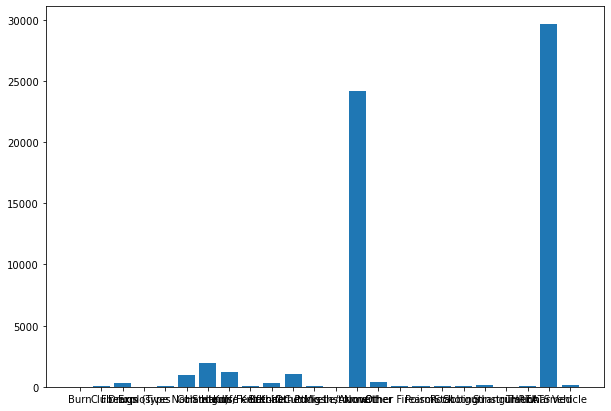

In [82]:
weaponType = df41['weapon']
weaponCount = df41['Number of Weapon Type']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(weaponType, weaponCount)

 
# Show Plot
plt.show()

C:\Users\sslomowitz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

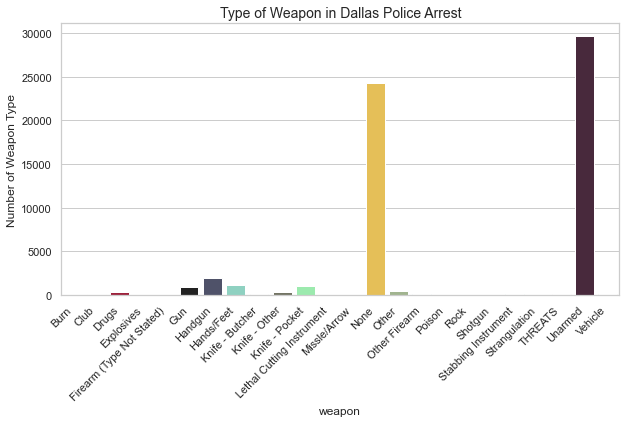

In [83]:
weaponType = df41['weapon']
weaponCount = df41['Number of Weapon Type']


color_dict = {"Burn":'#3F84E5',"Club": '#F0E2E7', "Drugs":'#B20D30',"Explosives":'#C17817', "Firearm (Type Not Stated)":'#3F784C',
         "Gun":'#222222',"Handgun":"#4B4E6D","Hands/Feet":'#84DCC6',"Knife - Butcher":"#95A3B3","Knife - Other":"#757761",
         "Knife - Pocket":'#8FF7A7',"Lethal Cutting Instrument":'#51BBFE',"Missle/Arrow":'#3772FF',"None":'#FDCA40',"Other":'#A1BA89',
         "Other Firearm":'#03B5AA',"Poison":'#037971',"Rock":'#023436',"Shotgun":'#00BFB3', "Stabbing Instrument":'#049A8F',
         "Strangulation":'#EDD4B2',"THREATS":'#D0A98F',"Vehicle":'#4D243D',"Unarmed":"#4D243D"}


plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
chart=sns.barplot(weaponType, weaponCount,palette = color_dict)
sns.color_palette("mako", as_cmap=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Type of Weapon in Dallas Police Arrest', size=14)
plt.show


In [84]:
df40 = df30.groupby(["year","race"]).agg({"age":"mean","race":"count"})
df40

age  race
year race                                             
2014 American Indian or Alaska Native  37.363636    11
     Asian                             33.507246    69
     Black                             36.328706  2449
     Hispanic or Latino                31.529188  1576
     Middle Eastern                    30.478261    23
...                                          ...   ...
2022 Black                             36.449405   336
     Hispanic or Latino                30.416928   319
     Middle Eastern                    34.333333     3
     Native Hawaiian/Pacific Islander  34.500000     2
     White                             38.773399   203

[63 rows x 2 columns]

In [85]:
df50 = df30.groupby(["year","gender","race", "weapon","drugRelated","day"]).agg({"gender":"count","race":"count","age":"mean"})
df50
df51=df50.rename(columns={"gender": "genderCount"})

In [86]:
df51

genderCount  \
year gender race                             weapon  drugRelated day                
2014 Female American Indian or Alaska Native None    No          Tue            1   
                                                                 Wed            2   
                                                     Uknown      Mon            1   
                                                                 Wed            1   
            Asian                            None    No          Fri            1   
...                                                                           ...   
2022 Male   White                            Unarmed Yes         Sat            3   
                                                                 Sun            2   
                                                                 Thu            5   
                                                                 Tue            2   
                                                                 Wed            1   

                                                                      race  \
year gender race                             weapon  drugRelated day         
2014 Female American Indian or Alaska Native None    No          Tue     1   
                                                                 Wed     2   
                                                     Uknown      Mon     1   
                                                                 Wed     1   
            Asian                            None    No          Fri     1   
...                                                                    ...   
2022 Male   White                            Unarmed Yes         Sat     3   
                                                                 Sun     2   
                                                                 Thu     5   
                                                                 Tue     2   
                                                                 Wed     1   

                                                                       age  
year gender race                             weapon  drugRelated day        
2014 Female American Indian or Alaska Native None    No          Tue  50.0  
                                                                 Wed  39.0  
                                                     Uknown      Mon  45.0  
                                                                 Wed  46.0  
            Asian                            None    No          Fri  59.0  
...                                                                    ...  
2022 Male   White                            Unarmed Yes         Sat  32.0  
                                                                 Sun  44.0  
                                                                 Thu  45.2  
                                                                 Tue  25.5  
                                                                 Wed  33.0  

[4392 rows x 3 columns]

In [87]:
df52=df51.reset_index("year").reset_index("gender").reset_index("weapon").reset_index("drugRelated").reset_index("day")
df53=df52.rename(columns={"race": "arrestCount"}).rename(columns={"age": "avgAge"})
df54=df53.reset_index("race")
df55=df54.round({"avgAge":1})
df55

,race,day,drugRelated,weapon,gender,year,genderCount,arrestCount,avgAge
0,American Indian or Alaska Native,Tue,No,None,Female,2014,1,1,50.0
1,American Indian or Alaska Native,Wed,No,None,Female,2014,2,2,39.0
2,American Indian or Alaska Native,Mon,Uknown,None,Female,2014,1,1,45.0
3,American Indian or Alaska Native,Wed,Uknown,None,Female,2014,1,1,46.0
4,Asian,Fri,No,None,Female,2014,1,1,59.0
...,...,...,...,...,...,...,...,...,...
4387,White,Sat,Yes,Unarmed,Male,2022,3,3,32.0
4388,White,Sun,Yes,Unarmed,Male,2022,2,2,44.0
4389,White,Thu,Yes,Unarmed,Male,2022,5,5,45.2
4390,White,Tue,Yes,Unarmed,Male,2022,2,2,25.5


In [88]:
# df55.to_json(orient="records", path_or_buf = "genderYear9.json")

In [89]:
# result = df55.to_html()
# print(result)

In [90]:
df50 = df30.groupby(["year","gender","race", "weapon","day"]).agg({"year":"count"})
df51 = df50.rename(columns={"year": "arrestCount"})
df52=df51.reset_index("year").reset_index("gender").reset_index("race").reset_index("weapon").reset_index("day")
df52.set_index("arrestCount")

,day,weapon,race,gender,year
arrestCount,,,,,
1,Mon,None,American Indian or Alaska Native,Female,2014
1,Tue,None,American Indian or Alaska Native,Female,2014
3,Wed,None,American Indian or Alaska Native,Female,2014
1,Fri,None,Asian,Female,2014
4,Mon,None,Asian,Female,2014
...,...,...,...,...,...
30,Sat,Unarmed,White,Male,2022
26,Sun,Unarmed,White,Male,2022
13,Thu,Unarmed,White,Male,2022


In [91]:
df52.to_json(orient="records", path_or_buf = "genderYear11.json")

In [92]:
df52

,day,weapon,race,gender,year,arrestCount
0,Mon,None,American Indian or Alaska Native,Female,2014,1
1,Tue,None,American Indian or Alaska Native,Female,2014,1
2,Wed,None,American Indian or Alaska Native,Female,2014,3
3,Fri,None,Asian,Female,2014,1
4,Mon,None,Asian,Female,2014,4
...,...,...,...,...,...,...
2619,Sat,Unarmed,White,Male,2022,30
2620,Sun,Unarmed,White,Male,2022,26
2621,Thu,Unarmed,White,Male,2022,13
2622,Tue,Unarmed,White,Male,2022,21
